# EXPLORATION OF LOAN DATASET FROM PROSPER
## by: Oni, Segun John

## Investigation Overview


> In this investigation, I intended to gain insight from the characteristics of loans that could be used to predict their borrower APR. The key focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income and other features. The key objectives of this project were:
- I'm most interested in gaining insight into the features that affect borrower’s APR.
- To gain insight into the relationships among several variables using summary statistics and data visualizations.

## Dataset Overview

> The dataset consists of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

## Limiting the large dataset to the useful columns needed for this exploration
cols = ["Term", "CreditGrade", "LoanStatus", "BorrowerAPR", 
        "BorrowerRate", "LenderYield", "ProsperRating (Alpha)", 
        "ListingCategory (numeric)", "Occupation", "ProsperScore", "EmploymentStatus",
        "EmploymentStatusDuration", "LoanOriginalAmount", "LoanOriginationDate",
        "StatedMonthlyIncome", "DebtToIncomeRatio", "BorrowerState", "IsBorrowerHomeowner",
        "TotalProsperLoans"
]
loan = loan[cols]
loan.head()


# Making a copy of Dataset
loan_clean = loan.copy()
loan_clean.shape

(113937, 19)

In [4]:
# Function defining titles and labels going forward
def x_y_t(xL, yL, title):
    plt.title(title, fontsize=18)
    plt.xlabel(xL, fontsize=16)
    plt.ylabel(yL, fontsize=16);

### Distribution of Credit Grade and Prosper Rating

> Both Credit Grade and Prosper Ratings allow potential investors to easily consider a loan application's level of risk because the rating represents an estimated average annualized loss rate range to the investor, which is based on the historical performance of loans with similar characteristics, both from The Fed and Prosper. According to Prosper, the ratings are:<br>
<br> <u>__AA__: (0.00-1.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__A:__ (2.00–3.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__B:__ (4.00–5.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__C:__ (6.00–8.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__D:__ (9.00–11.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__E:__ (12.00–14.99%)</u>, &nbsp; &nbsp; &nbsp; <u>__HR:__ (≥ 15.00%)</u><br>

> From the analysis above it is observed that borrowers with <b>C</b> rating are the most on Prosepr, meaning that investors may loss their investment 6% - 9% of the time. Lenders may depend on this rating, to consciously deploy their funds and avoid the risk of loossing their funds

- <u style="color:red">_Note:_</u>
Prosper <a href="https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline">declares</a> that estimated loss rates are not a guarantee and actual performance may differ from expected performance.

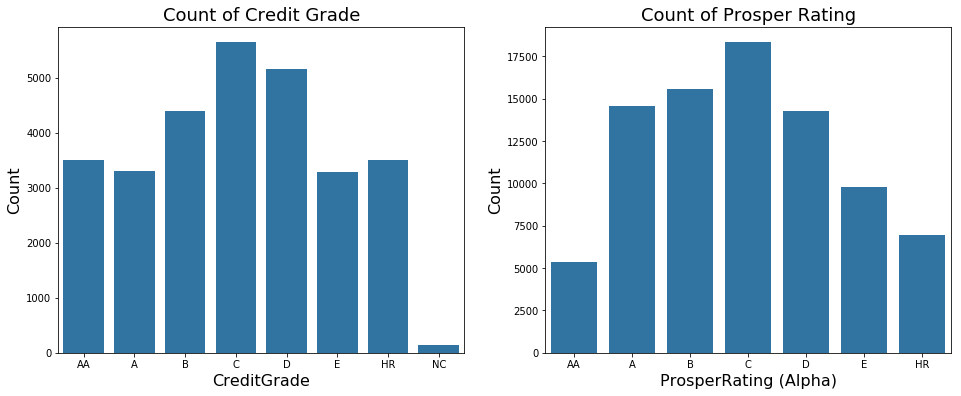

In [5]:
# dropping null value
loan_clean['ProsperRating (Alpha)'].dropna(inplace=True)

# assigning counts of both columns
cg_order = ("AA", "A", "B", "C", "D", "E", "HR", "NC")
pr_A_order = ("AA", "A", "B", "C", "D", "E", "HR")

# Plotting counts against Credit Grade and Prosper Rating
base_color = sb.color_palette()[0]
plt.figure(figsize = [16, 6])

# Left plot: Distributions of Prosper Rating
plt.subplot(1,2,1)
sb.countplot(data=loan_clean, x=loan_clean['CreditGrade'], color=base_color, order=cg_order);
# Funtion definig labels and title
x_y_t('CreditGrade', 'Count', 'Count of Credit Grade')


# RIGHT plot: Distributions of Prosper Rating
plt.subplot(1,2,2)
sb.countplot(data=loan_clean, x=loan_clean['ProsperRating (Alpha)'], color=base_color, order=pr_A_order);
# Funtion definig labels and title
x_y_t('ProsperRating (Alpha)', 'Count', 'Count of Prosper Rating')

## Distribution of Purpose for Loan
The most prominent reason why borrowers need loans is for Debt Consolidation. This means borrowers take out a new loan to pay off previous liabilities and consumer debts. The multiple debts may be combined into a single, larger debt, usually with more favourable payoff terms. Lenders need to be aware of these various reasons for funds.

Whether this reason affects borrowers' rating and APR will be investigated later on.

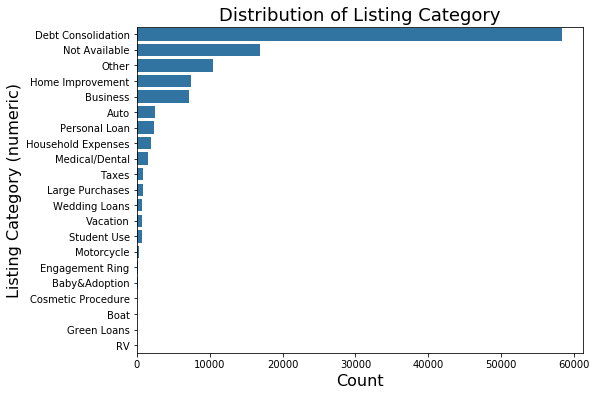

In [7]:
# Resetting the Values of Listing Category to make new column
old = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
      11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

new = ['Not Available', 'Debt Consolidation', 'Home Improvement','Business', 
       'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat',
       'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses',
       'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 
       'Wedding Loans']

# Replacing the values of Listing Category
loan_clean["ListingCategory (text)"] = loan_clean["ListingCategory (numeric)"].replace(old, new)

# Setting the Index in prep for barh
type_order = loan_clean["ListingCategory (text)"].value_counts().index

# Plotting thw Distributions of Listing Category
fig, ax = plt.subplots(figsize=(8, 6))
base_color = sb.color_palette()[0]
sb.countplot(data=loan_clean, y='ListingCategory (text)', color=base_color,  order = type_order)

# Funtion definig labels and title
x_y_t('Count', 'Listing Category (numeric)', 'Distribution of Listing Category')
plt.show();

## Distribution of Loan Term
As observed, the most loan term is 36 months, followed by 60 months and 12months respectively. This means that lenders are more willing to committ their funds to mid-term loan than long and short terms. A relationship between Loan Term and Borrowers APR will help to bring clarity to whether the 36month term loan have higher APR than than the two other terms.

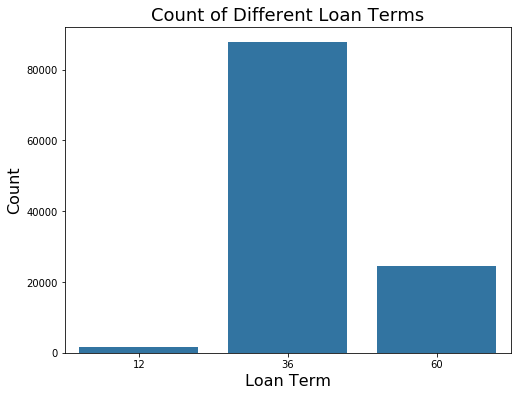

In [8]:
# plotting the Term of loan
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_clean, x = 'Term', color = base_color);

# Funtion definig labels and title
x_y_t('Loan Term', 'Count', 'Count of Different Loan Terms')

## Relationship Between CreditngGrade, ProsperRating (Alpha) and Borrower APR
> The plots shows that there are outliers for both Grading type. It is however certain that Lenders consider more than just the CreditGrade and Listing Category to determine APR.<br><br>
>**Credit Grade:**
- All APRs range from a minimum of 0% to a maximum of 54%, except for *NC* grade category that has a minimum of about 8%.
- With and without consideration to Outliers, the HR Grade seem to have attracted the highest APR value, maxing out at about 41% - 54%.
- This may be a confusing rating system to apply for Lenders.<br><br>

## Relationship Between CreditngGrade, ProsperRating (Alpha) and Borrower APR (Contd.)
> **Prosper Rating:**
- All APRs, with or without outliers, have different minimums and maximum values.
- With consideration to outliers, _HR_ ratings have the highest values, for maximun and minimum values.
- Without consideration to outliers, _AA_ ratings have the lowest minimum and maximun value.
- This rating appears to be better than, and more reliable than _Credit Grading_.

> **Good Rating reduces APR and poor Ratings increases APR, for Obvious reasons**

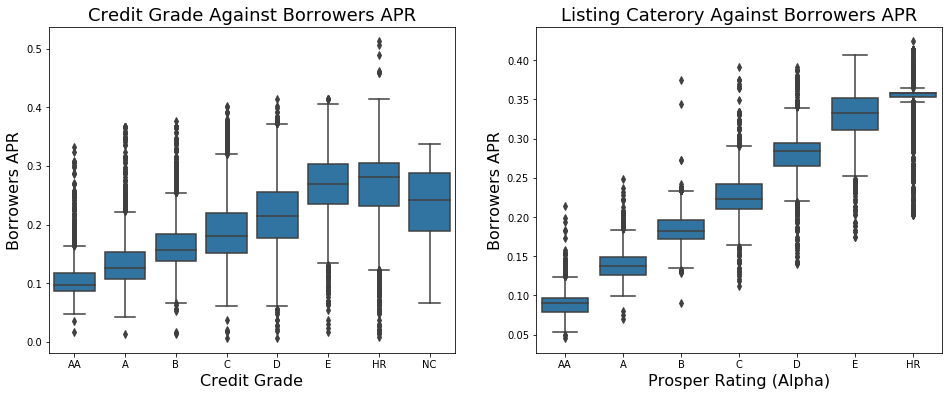

In [9]:
# box plot
plt.figure(figsize = [16, 6])

# Left Plot
plt.subplot(1,2,1)
sb.boxplot(data=loan_clean, x='CreditGrade', y='BorrowerAPR', color=base_color, order=cg_order);
# Funtion definig labels and title
x_y_t('Credit Grade', "Borrowers APR", 'Credit Grade Against Borrowers APR')

# Right Plot
plt.subplot(1,2,2)
sb.boxplot(data=loan_clean, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color, order=pr_A_order);
# Funtion definig labels and title
x_y_t('Prosper Rating (Alpha)', "Borrowers APR", 'Listing Caterory Against Borrowers APR')

## Relationship between Listing Category (Purpose of Loan ) and Borrower APR
- The Plot makes it clear that Lenders require higher APRs for Debt Consolidation, Home Improvement, Business, Autos, Personal loan and student use than all other purposes of loan; that ranges with similar minimums and maximums, except for Not available and Other categories, which are clearly higher than all; either by oulier or maximum values, respectively.

- This further proves that Lenders are interested in the purpose for loans, and these purposes affect APRs

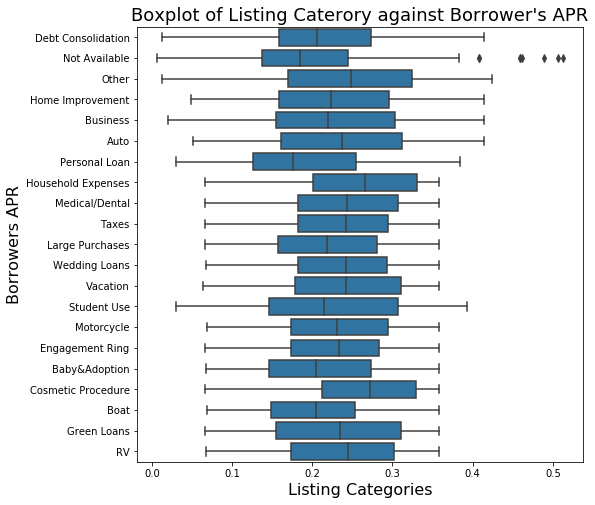

In [11]:
# box plot
plt.figure(figsize=(8, 8))
sb.boxplot(data=loan_clean, y='ListingCategory (text)', x='BorrowerAPR', color=base_color, order = type_order);
# Funtion definig labels and title
x_y_t('Listing Categories', "Borrowers APR", "Boxplot of Listing Caterory against Borrower's APR")

## Relationship between Loan Term and Borrower ARP
- 36 Months loan term, truely attracts higher APR tah all other Terms. On the average, 12 Months Loan term is higher than both.
- The category or purpose of loan that populates the 36 months gap will be observed later, as this will throw light of their various effects on APR

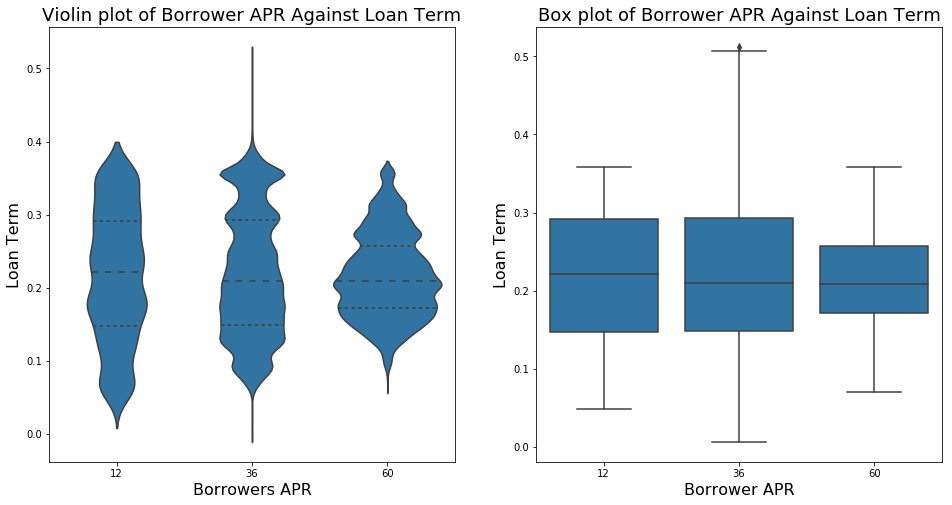

In [12]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[0]

# LEFT plot: Violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data=loan_clean, x='Term', y='BorrowerAPR', color=base_color, inner='quartile');
# Funtion definig labels and title
x_y_t("Borrowers APR", "Loan Term",  "Violin plot of Borrower APR Against Loan Term")


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loan_clean, x='Term', y='BorrowerAPR', color=base_color);
# Funtion definig labels and title
x_y_t("Borrower APR", "Loan Term", "Box plot of Borrower APR Against Loan Term")

## Relationship between Borrrowers' ARP, Loan Status and Term of loan

- Over the 12 months Term, Other and Business have the highest APR ata about 33%, followed by loans for Auto, Taxes and RV, respectively.
- Over the 36 months Term, Household expense and Cosmetic Procedure are the highest APRs at about 35.5% each, followed by Other, Medical/Dental, Vacation and Wedding Loans, respectively.
- Over the 60 months Term, Green Loan has the highest APR at about 34%, followed by Cosmetic procedure, Household expense and Vacation, respectively.

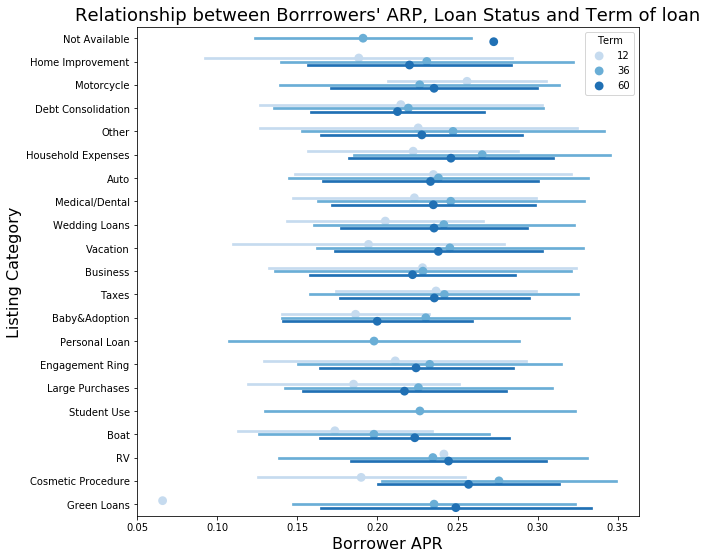

In [14]:
# Plot a multivariate
plt.figure(figsize = [9, 9])
sb.pointplot(data = loan_clean, 
             x = 'BorrowerAPR', 
             y = 'ListingCategory (text)', 
             hue = 'Term',
             palette = 'Blues', 
             linestyles = '', 
             dodge = 0.3, 
             ci='sd')
# Funtion definig labels and title
x_y_t("Borrower APR", "Listing Category", "Relationship between Borrrowers' ARP, Loan Status and Term of loan")

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 569480 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 